In [1]:
import sklearn.datasets

groups = ['comp.graphics', 'alt.atheism', 'rec.autos', 'talk.politics.guns', 'sci.space']

all_data = sklearn.datasets.fetch_20newsgroups(subset = 'all', categories=groups, remove=('headers', 'footers', 'quotes'))
print(len(all_data.filenames))

4659


In [2]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nikitabykov/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from sklearn.metrics import rand_score, jaccard_score


def calculate_metrics(labels_true, labels_pred):
    rand_score_value = rand_score(labels_true, labels_pred)
    jaccard_score_value = jaccard_score(labels_true, labels_pred, average='weighted')

    print(f"rand score value {rand_score_value}")
    print(f"jaccard score value {jaccard_score_value}")

def print_cluster_for_label(labels, print_label, print_count=5):
    unique_cluster_labels = np.unique(labels)
    print("labels: ", unique_cluster_labels)

    count_per_cluster = [0] * len(unique_cluster_labels)
        
    for i in labels:
        count_per_cluster[i] += 1

    print(f"label: label_cluster_elements_count")
    for ind, label in enumerate(unique_cluster_labels):
        print(f"label {unique_cluster_labels[ind]}: {count_per_cluster[ind]}")

    current_print_count = 0
    
    for ind, label in enumerate(labels):
        if current_print_count >= print_count:
            break
            
        if label == print_label:
            print(f"target_label: {all_data.target[ind]}")
            print(all_data.data[ind])
            
            print()
            print("=========================")
            print()
            
            current_print_count += 1

In [4]:
import nltk.stem
from nltk.tokenize import word_tokenize

english_stemmer = nltk.stem.SnowballStemmer('english')

for i in range(len(all_data.data)):
    word_list = word_tokenize(all_data.data[i])
    stemmed_doc = ""
    for word in word_list:
        stemmed_doc = stemmed_doc + " " + english_stemmer.stem(word)
    all_data.data[i] = stemmed_doc  

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 2, stop_words=["english"], token_pattern=r"[^\W\d_]+")
print(vectorizer)

vectorized = vectorizer.fit_transform(all_data.data)
# число сообщений, длина словаря
num_samples, num_features = vectorized.shape
print('num_samples= %d, num_features= %d' % (num_samples, num_features))

TfidfVectorizer(min_df=2, stop_words=['english'], token_pattern='[^\\W\\d_]+')
num_samples= 4659, num_features= 13334


In [9]:
print(vectorizer.get_feature_names_out())

['a' 'aa' 'aaa' ... 'zx' 'zyxel' 'þ']


In [10]:
print(vectorized.shape)

(4659, 13334)


In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np



model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))


visualizer.fit(np.array(vectorized, ))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

ValueError: setting an array element with a sequence.

For n_clusters = 2 The average silhouette_score is : 0.013468422487081907
For n_clusters = 3 The average silhouette_score is : 0.012557052126560681
For n_clusters = 4 The average silhouette_score is : 0.007019434123066545
For n_clusters = 5 The average silhouette_score is : -0.0018448648016679127
For n_clusters = 6 The average silhouette_score is : -0.0007908006699732649
For n_clusters = 7 The average silhouette_score is : 0.0001365689133812265
For n_clusters = 8 The average silhouette_score is : 0.003519930433859197
For n_clusters = 9 The average silhouette_score is : -0.0033708748023127976
For n_clusters = 10 The average silhouette_score is : -0.008368092868091554
For n_clusters = 11 The average silhouette_score is : -0.004135304159933884
For n_clusters = 12 The average silhouette_score is : -0.001921077019380403
For n_clusters = 13 The average silhouette_score is : -0.0008095486672956965
For n_clusters = 14 The average silhouette_score is : 0.0002694647555670404


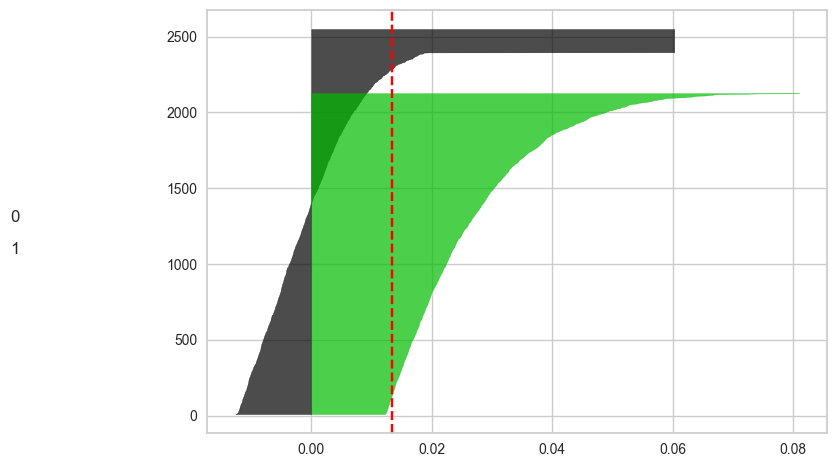

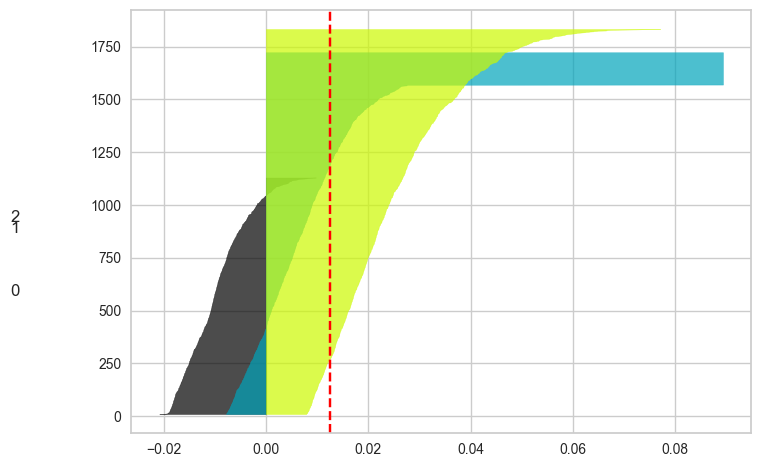

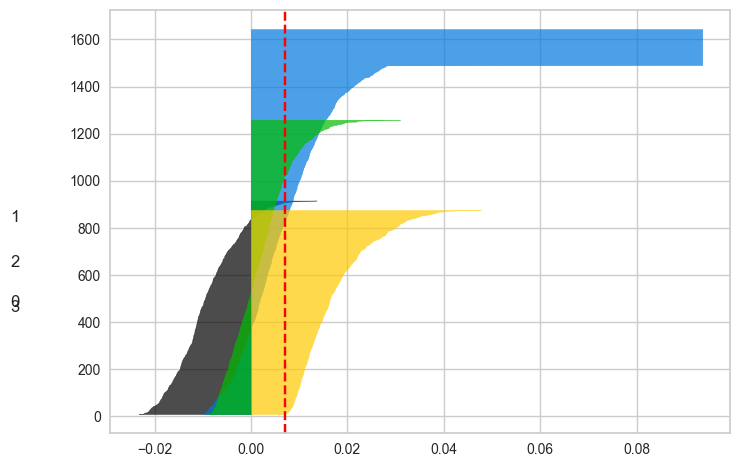

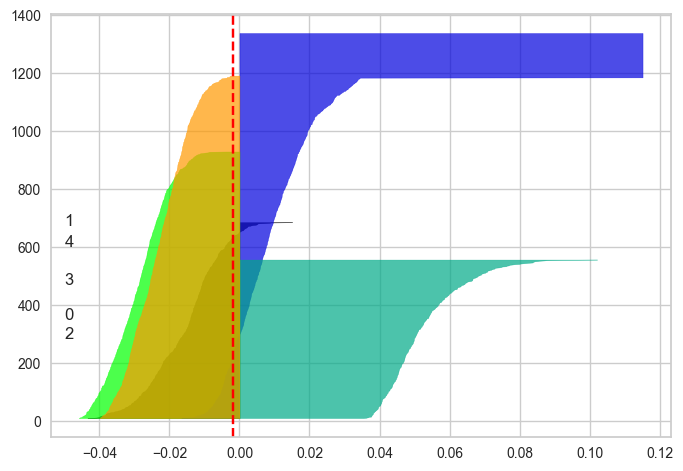

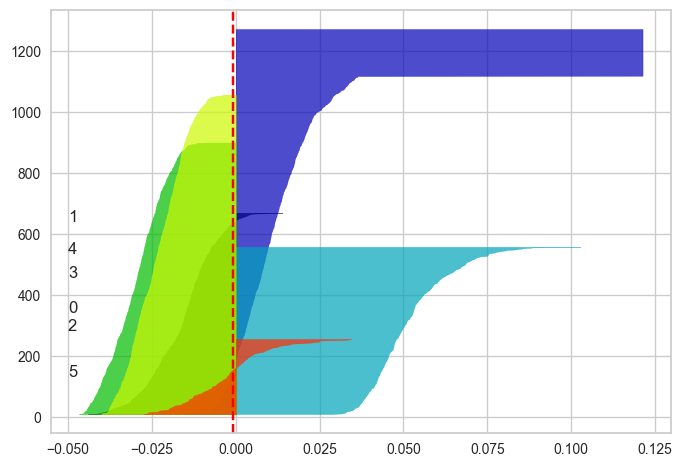

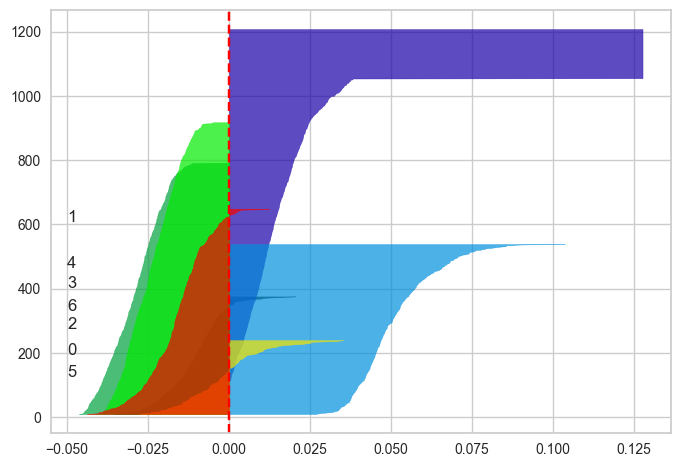

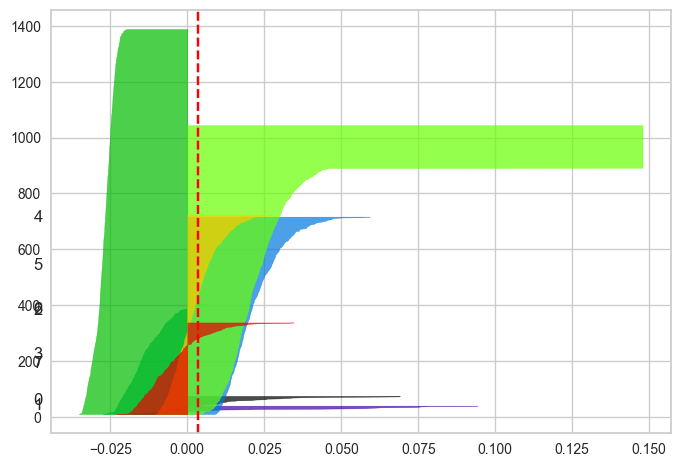

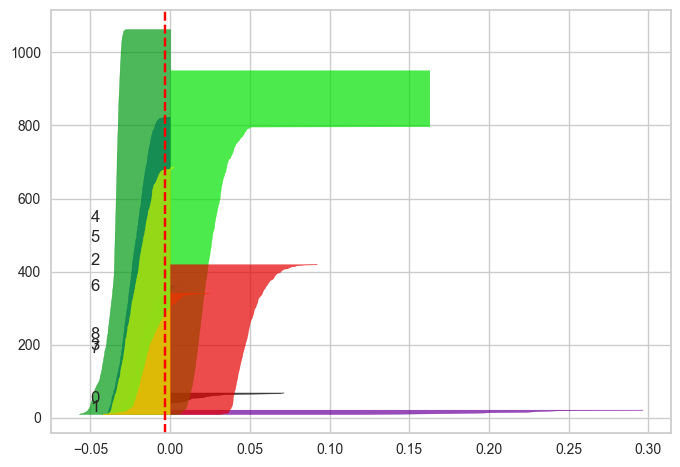

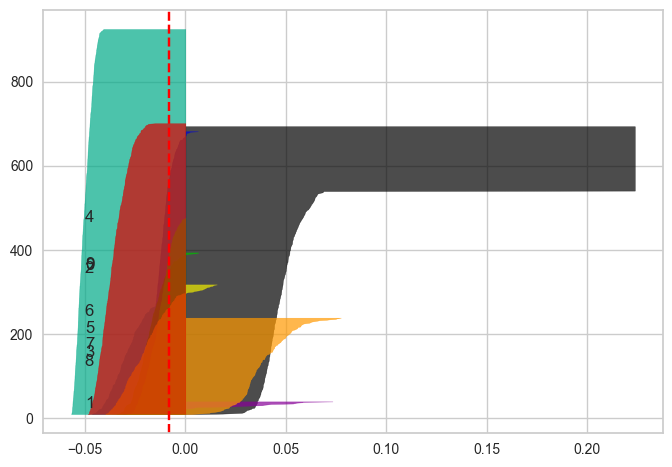

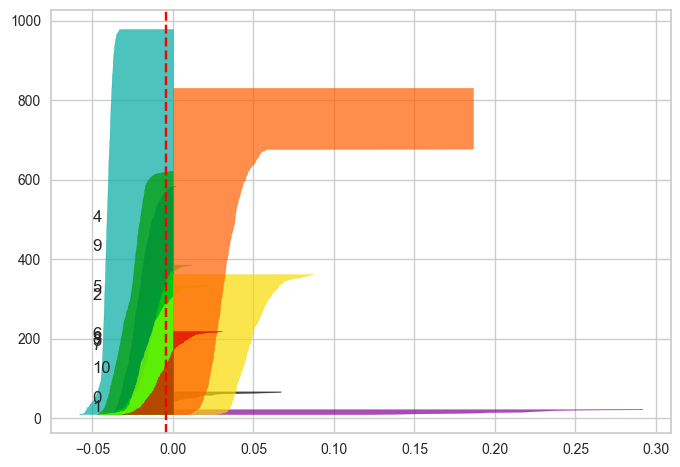

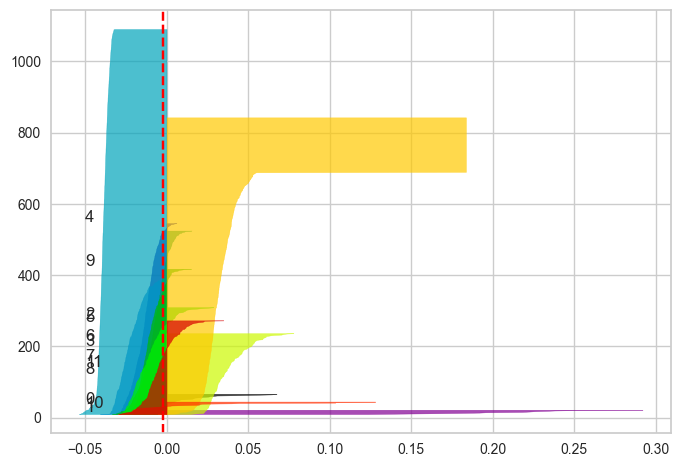

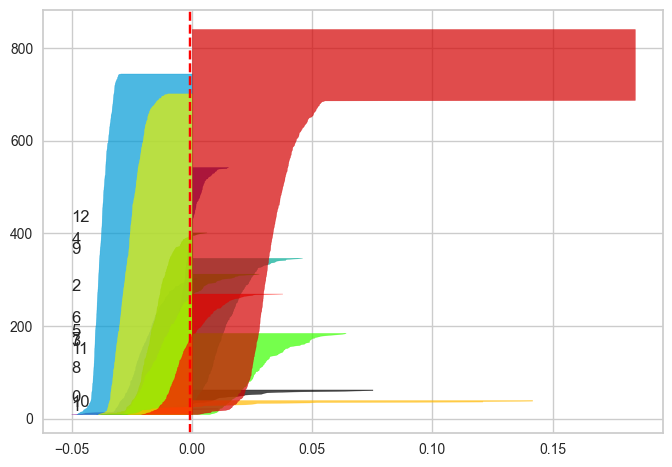

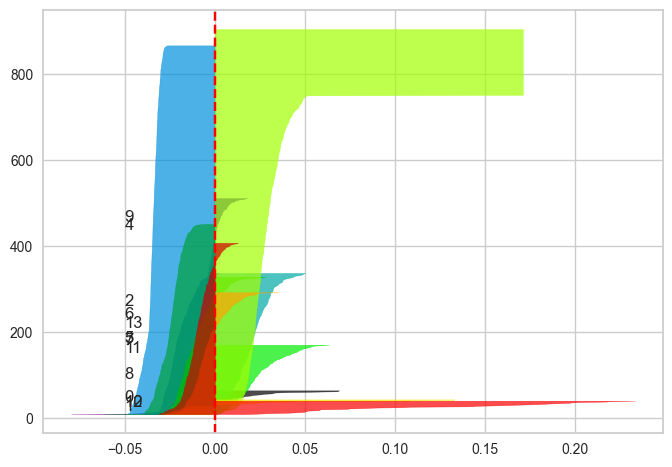

In [38]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    fig = plt.figure()
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(vectorized)

    silhouette_avg = silhouette_score(vectorized, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(vectorized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # plt.show()

In [39]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels_kmeans = clusterer.fit_predict(vectorized)
unique_cluster_labels_kmeans = np.unique(cluster_labels_kmeans)

print(unique_cluster_labels_kmeans)

[0 1 2]


In [22]:
print_cluster_for_label(cluster_labels_kmeans, 0, print_count=10)

labels:  [0 1 2]
label: label_cluster_elements_count
label 0: 1121
label 1: 1714
label 2: 1824
target_label: 1
 i have a group of gif imag that each contain 6 small imag in the same place on all the imag . i need a program to crop out the small imag to a new gif file . all the program i can find make me use the mous or keyboard to defin the crop coordin . is there a program out there for a pc that can take the crop coordin on the command line ?


target_label: 2
 hello , i am look to slight increas the perform of my 89 honda civic si . i was wonder if anyon could suggest upgrad that were not too drastic . i thought that one of the easiest upgrad would be a new header . doe anyon know what kind of increas that the header would give me ? i think i would check with jackson race for the part . are there ani other comparin would make honda part . are there ani other small chang that can be easili made and wo n't screw up the car . thing like new injector ? , new fuel inject chip etc ? i wou

In [23]:
calculate_metrics(cluster_labels_kmeans, all_data.target)

rand score value 0.6183467761073342
jaccard score value 0.10481631064829197


In [24]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=0.9)
cluster_labels_dbscan = clusterer.fit_predict(vectorized)

unique_cluster_labels_dbscan = np.unique(cluster_labels_dbscan)

print(unique_cluster_labels_dbscan)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [25]:
print_cluster_for_label(cluster_labels_dbscan, 5, print_count=10)

labels:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
label: label_cluster_elements_count
label -1: 154
label 0: 5
label 1: 14
label 2: 5
label 3: 6
label 4: 6
label 5: 10
label 6: 5
label 7: 6
label 8: 5
label 9: 5
label 10: 5
label 11: 5
label 12: 5
label 13: 5
label 14: 6
label 15: 4412
target_label: 0
 give me a call when you build a work model . then we ll talk stock option . -- - privat note to jennif fakult . `` this post may contain one or more of the follow : sarcasm , cycnic , ironi , or humor . pleas be awar of this possibl and do not allow yourself to be confus and/or thrown for a loop . if in doubt , assum all of the abov .


target_label: 0
 let me guess : you re not a psycho-analyst in real life , but you play one on alt.ath . right ? is esp someth you have been given by god ? -- - privat note to jennif fakult . `` this post may contain one or more of the follow : sarcasm , cycnic , ironi , or humor . pleas be awar of this possibl and do not allow yourself to be 

In [26]:
calculate_metrics(cluster_labels_dbscan, all_data.target)

rand score value 0.2628935293408023
jaccard score value 0.0007140744200959481


In [13]:
from sklearn.cluster import Birch

clusterer = Birch(threshold=0.3, branching_factor=30, n_clusters=5)
cluster_labels_birch = clusterer.fit_predict(vectorized)

unique_cluster_labels_birch = np.unique(cluster_labels_birch)

print(unique_cluster_labels_birch)

[0 1 2 3 4]


In [14]:
print_cluster_for_label(cluster_labels_birch, 0, print_count=10)

labels:  [0 1 2 3 4]
label: label_cluster_elements_count
label 0: 1581
label 1: 1193
label 2: 781
label 3: 326
label 4: 778
target_label: 4
 the wall street journal had an articl on how the polic were whine about all the new gun ; excus me , but polic are employe of the govern . rather like have your janitor complain about job condit . i say californian should form arm block club that would engag in coordin strategi should batf attempt to disarm them base on the `` nefari tipster '' theori of law enforc . unlik waco , californian should be abl to destroy armor vehicl in citi street with incendiari weapon , acetylen after slow them down with abandon car blockad . m-1 garand should easili outclass batf shock troop with their h & k mp-5 smgs , and there should be enough soni walkman and boom box to overwhelm ani fbi psy-war oper ... yes , a good time would be had by all . billari clinton would get what he want , a war on gunown , the batf would attempt to show the anti-gun press they they

In [15]:
calculate_metrics(cluster_labels_birch, all_data.target)

rand score value 0.7134933047861584
jaccard score value 0.0750186406235484


4659


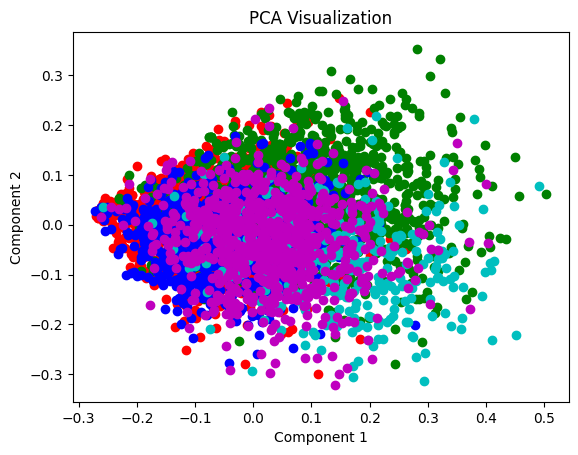

In [16]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_embedded = pca.fit_transform(vectorized)

X_embedded_by_class = [[] for _ in range(5)]

print(len(X_embedded))
for i, row in enumerate(X_embedded):
    X_embedded_by_class[cluster_labels_birch[i]].append(row)



# Визуализация
plt.figure('PCA Visualization')
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

colors = ['r', 'g', 'b', 'c', 'm']
for i, x in enumerate(X_embedded_by_class):
    x = np.array(x)
    plt.scatter(x[:, 0], x[:, 1], c=colors[i])

plt.show()

1581


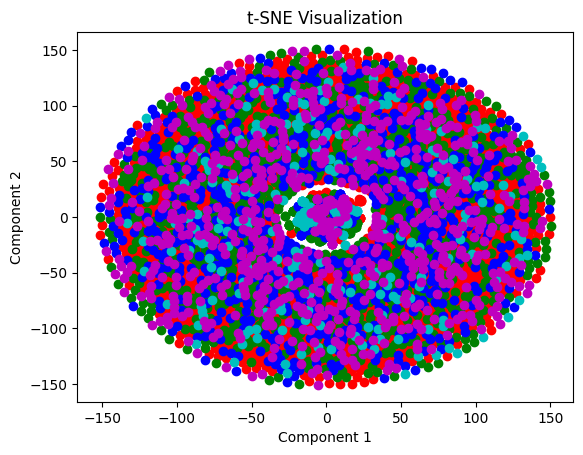

1581


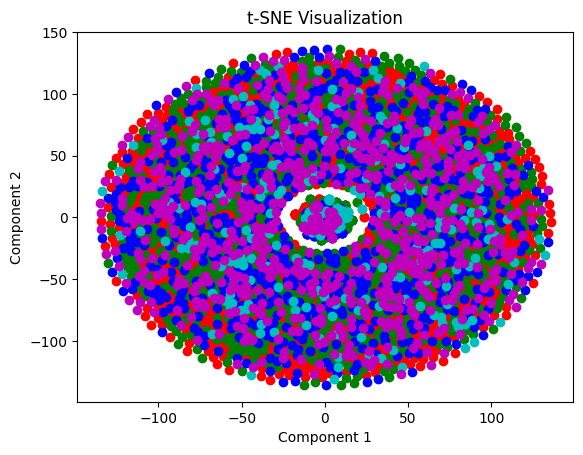

1581


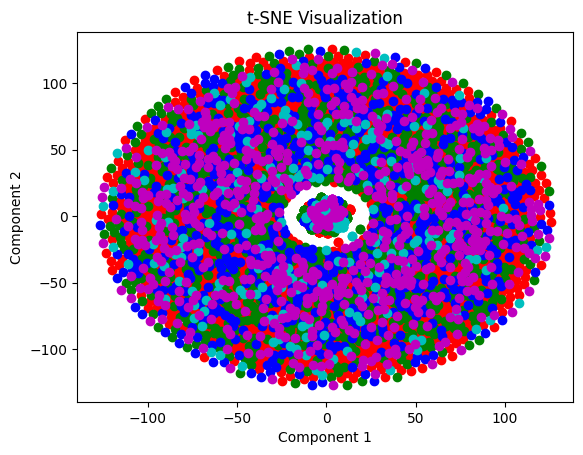

1581


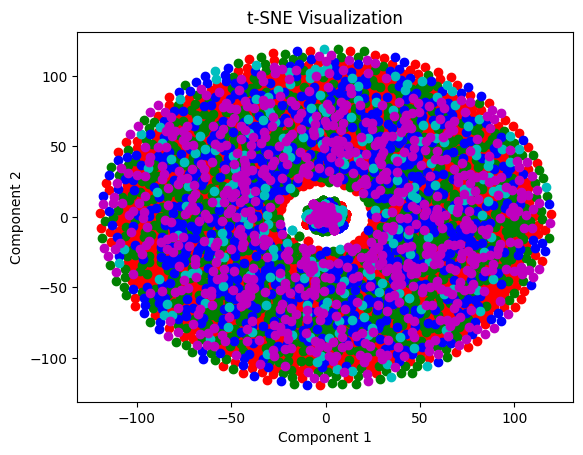

1581


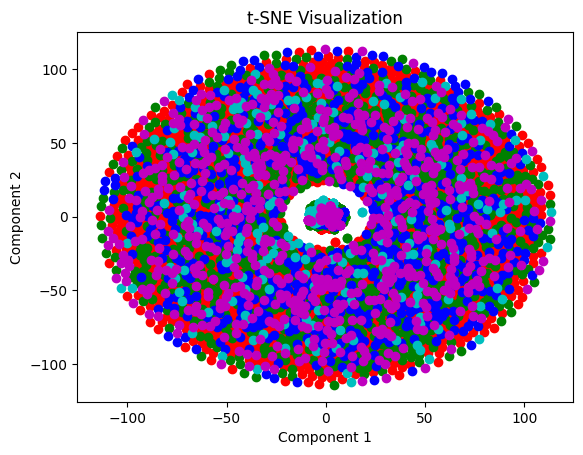

In [17]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

import numpy as np


for perplexity in range(10, 51, 10):
    # Применение t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, init='random')
    X_embedded = tsne.fit_transform(vectorized)
    
    X_embedded_by_class = [[] for _ in range(5)]
    
    for i, row in enumerate(X_embedded):
        class_label = cluster_labels_birch[i]
        X_embedded_by_class[cluster_labels_birch[i]].append(row)
    print(len(X_embedded_by_class[0]))
    
    # Визуализация
    plt.figure('t-SNE Visualization')
    plt.title('t-SNE Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    colors = ['r', 'g', 'b', 'c', 'm']
    for i, x in enumerate(X_embedded_by_class):
        x = np.array(x)
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
    
    plt.show()